In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
data = pd.read_csv("./archive/mushrooms.csv")

In [29]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [30]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [31]:
data.shape

(8124, 23)

In [32]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [33]:
for col in data.columns:
    data[str(col)] = label_encoded(data[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


C:\Users\Ahmet Yusuf Alan\AppData\Local\Temp\ipykernel_14736\1242861838.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


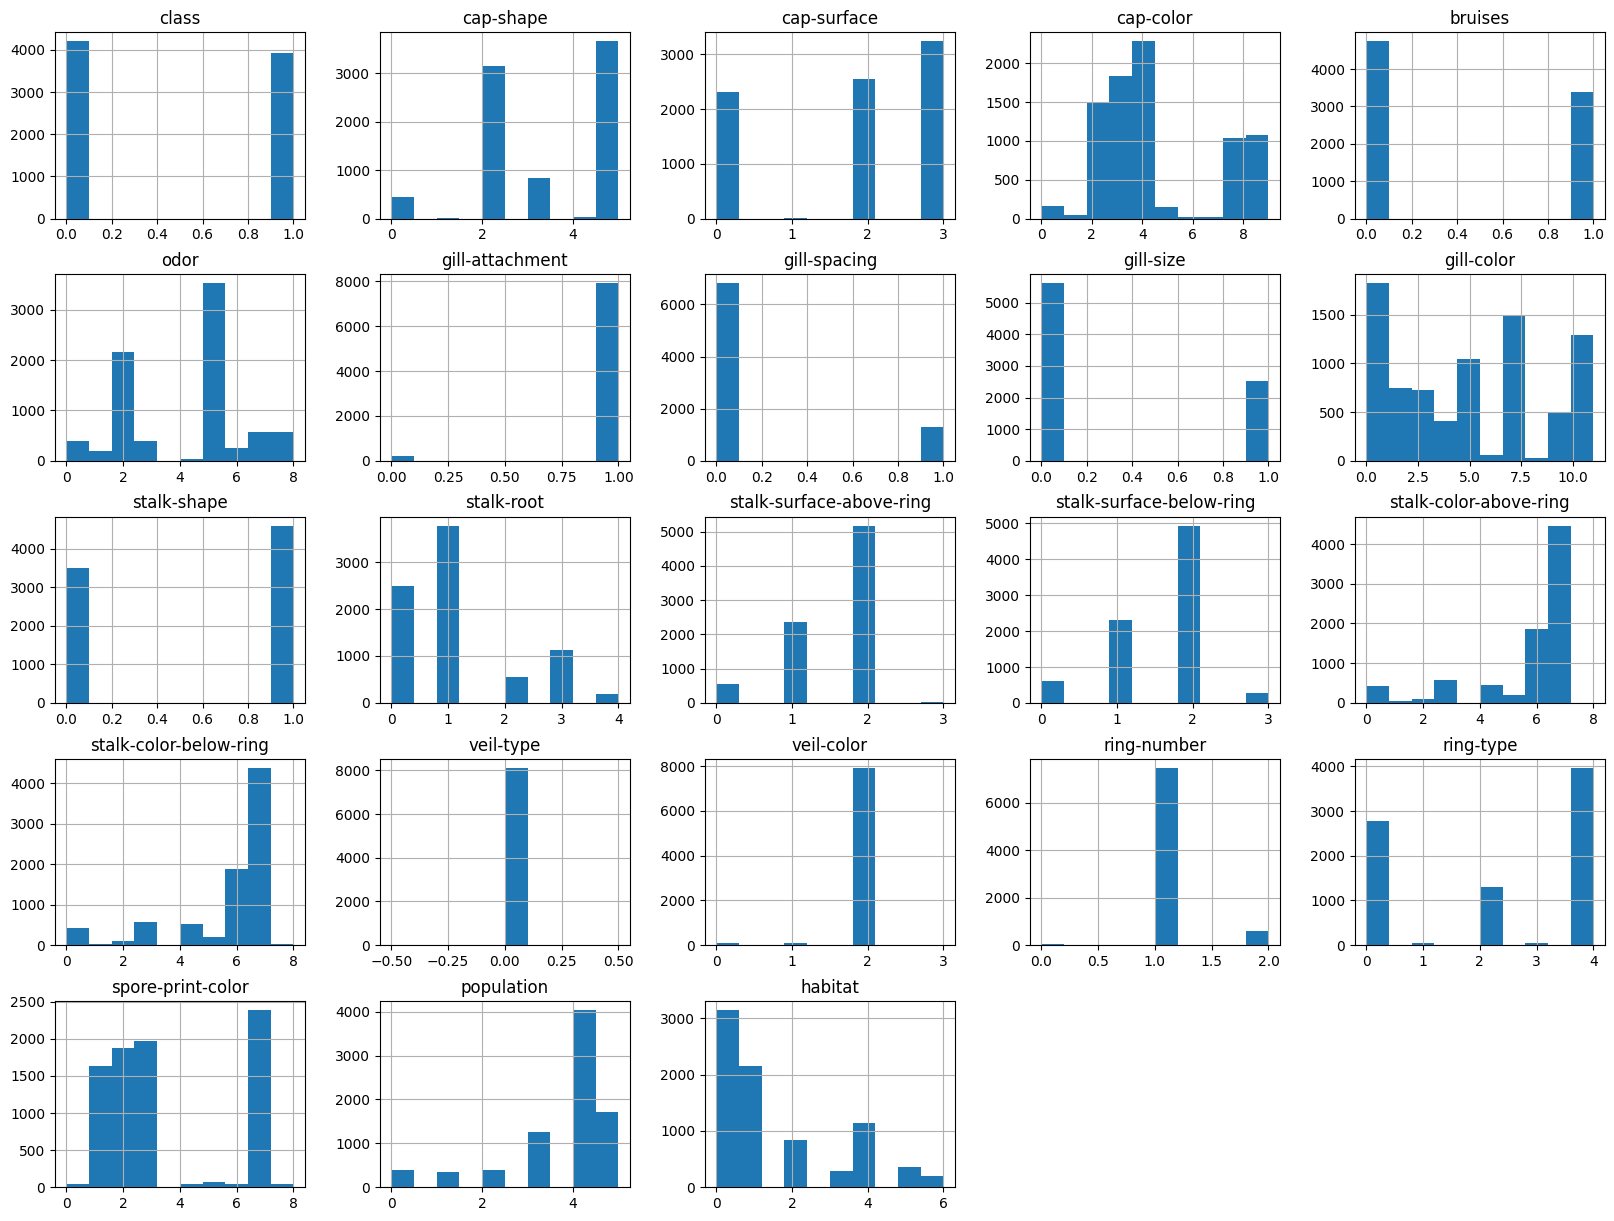

In [34]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

In [35]:
X = data.drop(['class','veil-type','gill-attachment','ring-type','gill-color','bruises',"cap-shape","cap-color", "odor", "stalk-color-above-ring", "cap-surface", "stalk-shape", "stalk-color-below-ring", "veil-color","spore-print-color", "habitat", "gill-size" , ],axis=1)
y = data['class']

In [36]:
X.columns

Index(['gill-spacing', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'ring-number', 'population'],
      dtype='object')

In [37]:
X.corr().abs()

,gill-spacing,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,population
gill-spacing,1.000000,0.350548,0.212359,0.213775,0.243014,0.529253
stalk-root,0.350548,1.000000,0.027065,0.087454,0.247357,0.306747
stalk-surface-above-ring,0.212359,0.027065,1.000000,0.437164,0.107904,0.079604
stalk-surface-below-ring,0.213775,0.087454,0.437164,1.000000,0.040006,0.046797
ring-number,0.243014,0.247357,0.107904,0.040006,1.000000,0.242020
population,0.529253,0.306747,0.079604,0.046797,0.242020,1.000000


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4,random_state=42)

In [39]:
model_1 = RandomForestClassifier(max_depth=10, random_state=10)
model_1.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=10)

In [40]:
X_test

,gill-spacing,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,population
1971,1,3,2,0,1,3
6654,0,0,2,2,1,4
5606,0,0,1,2,1,4
3332,0,1,2,2,1,5
6988,0,0,2,2,1,4
...,...,...,...,...,...,...
898,0,2,2,2,1,3
428,1,3,0,0,1,0
5627,0,1,1,1,1,4
4030,0,1,1,1,1,5


In [41]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [42]:
y_pred = model_1.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred)

0.9673846153846154

In [44]:
import pickle

In [45]:
pickle.dump(model_1, open("mashrooms_clf.pkl", "wb"))

In [46]:
X.iloc[0]

gill-spacing                0
stalk-root                  3
stalk-surface-above-ring    2
stalk-surface-below-ring    2
ring-number                 1
population                  3
Name: 0, dtype: int32

In [47]:
model_1.predict([[1, 3, 2, 0, 1, 3]])

d:\App\MiniConda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])